In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 시각화를 위한 폰트 설정
import os
if os.name=="posix":
    sns.set(font="AppleGothic")
elif os.name=="nt":
    sns.set(font="Malgun Gothic")

In [3]:
# 글자를 선명하게
%config lnlineBackend.figure_format='retina'

In [4]:
# csv 파일을 pandas로 로드
df_raw=pd.read_csv("국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20210202120542.csv",encoding="cp949")

(450, 30)

In [6]:
# tidy-data로 변환
# 컬럼에 있던 데이터를 행으로 위치
df=df_raw.melt(id_vars=["국가(대륙)별","상품군별","판매유형별"],var_name="기간",value_name="백만원")
df

,국가(대륙)별,상품군별,판매유형별,기간,백만원
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,면세점 이외,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-
...,...,...,...,...,...
12145,기타,생활용품 및 자동차용품,면세점,2020 3/4 p),0
12146,기타,생활용품 및 자동차용품,면세점 이외,2020 3/4 p),353
12147,기타,기 타,계,2020 3/4 p),761
12148,기타,기 타,면세점,2020 3/4 p),0


In [7]:
# 띄어쓰기를 기준으로 나눈 첫번째 (연도) 컬럼 추가
df["연도"]=df["기간"].map(lambda x:int(x.split()[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도
0,합계,합계,계,2014 1/4,148272,2014
1,합계,합계,면세점,2014 1/4,-,2014
2,합계,합계,면세점 이외,2014 1/4,-,2014
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014


In [8]:
df=df[df['연도']>=2018]
df

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도
7200,합계,합계,계,2018 1/4,833672,2018
7201,합계,합계,면세점,2018 1/4,665613,2018
7202,합계,합계,면세점 이외,2018 1/4,168059,2018
7203,합계,컴퓨터 및 주변기기,계,2018 1/4,5236,2018
7204,합계,컴퓨터 및 주변기기,면세점,2018 1/4,2,2018
...,...,...,...,...,...,...
12145,기타,생활용품 및 자동차용품,면세점,2020 3/4 p),0,2020
12146,기타,생활용품 및 자동차용품,면세점 이외,2020 3/4 p),353,2020
12147,기타,기 타,계,2020 3/4 p),761,2020
12148,기타,기 타,면세점,2020 3/4 p),0,2020


In [11]:
# 결측치를 나타내는 문자 (0.0) 를 결측치로 변경하고 float으로 변경 
df["백만원"]=df["백만원"].replace("-",np.nan).astype(float)
df["백만원"]

<ipython-input-11-c52abb4a63ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["백만원"]=df["백만원"].replace("-",np.nan).astype(float)


7200     833672.0
7201     665613.0
7202     168059.0
7203       5236.0
7204          2.0
           ...   
12145         NaN
12146       353.0
12147       761.0
12148         NaN
12149       761.0
Name: 백만원, Length: 4950, dtype: float64

In [13]:
df.isnull().sum()

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
백만원        1247
연도            0
dtype: int64

In [78]:
df2=df[ (df["국가(대륙)별"]=="합계") & (df["판매유형별"]=="계")]
df2.isnull().sum()
df2

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도
7200,합계,합계,계,2018 1/4,833672.0,2018
7203,합계,컴퓨터 및 주변기기,계,2018 1/4,5236.0,2018
7206,합계,가전·전자·통신기기,계,2018 1/4,25635.0,2018
7209,합계,소프트웨어,계,2018 1/4,244.0,2018
7212,합계,서 적,계,2018 1/4,6193.0,2018
...,...,...,...,...,...,...
11730,합계,아동·유아용품,계,2020 3/4 p),4443.0,2020
11733,합계,음·식료품,계,2020 3/4 p),2640.0,2020
11736,합계,농축수산물,계,2020 3/4 p),41.0,2020
11739,합계,생활용품 및 자동차용품,계,2020 3/4 p),7864.0,2020


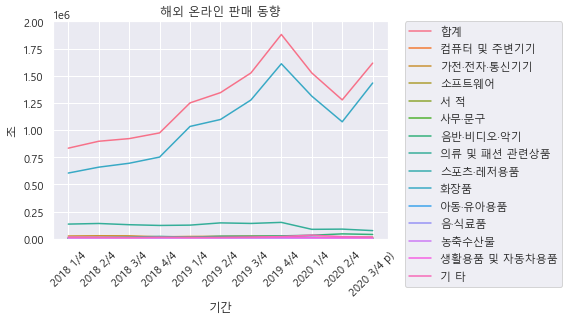

In [87]:
# 연도, 판매액 lineplot 그리기
plt.ylim(None,2000000)
plt.ylabel('조')
plt.xticks(rotation=45)
sns.lineplot(data=df2,x="기간",y="백만원",hue="상품군별",ci=None).set_title("해외 온라인 판매 동향")
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.show()

In [197]:
df3=df2.groupby('상품군별')['백만원'].mean().reset_index()
df3

,상품군별,백만원
0,가전·전자·통신기기,2.135264e+04
1,기 타,1.695127e+04
2,농축수산물,4.118182e+01
3,사무·문구,1.337636e+03
4,생활용품 및 자동차용품,1.066027e+04
5,서 적,6.609364e+03
6,소프트웨어,2.583636e+02
7,스포츠·레저용품,4.309364e+03
8,아동·유아용품,4.680818e+03
9,음·식료품,9.714273e+03


In [198]:
df3.sort_values('백만원',ascending=False)

,상품군별,백만원
13,합계,1.276839e+06
14,화장품,1.049918e+06
11,의류 및 패션 관련상품,1.222657e+05
10,음반·비디오·악기,2.429582e+04
0,가전·전자·통신기기,2.135264e+04
1,기 타,1.695127e+04
4,생활용품 및 자동차용품,1.066027e+04
9,음·식료품,9.714273e+03
5,서 적,6.609364e+03
8,아동·유아용품,4.680818e+03


In [199]:
df4=df3[df3['상품군별']!='합계'].sort_values('백만원',ascending=False)
df4

,상품군별,백만원
14,화장품,1.049918e+06
11,의류 및 패션 관련상품,1.222657e+05
10,음반·비디오·악기,2.429582e+04
0,가전·전자·통신기기,2.135264e+04
1,기 타,1.695127e+04
4,생활용품 및 자동차용품,1.066027e+04
9,음·식료품,9.714273e+03
5,서 적,6.609364e+03
8,아동·유아용품,4.680818e+03
12,컴퓨터 및 주변기기,4.444364e+03


In [205]:
df5=df4
df5['비율']=round(df4['백만원']/df4['백만원'].sum()*100,2)
df5

,상품군별,백만원,비율
14,화장품,1.049918e+06,82.23
11,의류 및 패션 관련상품,1.222657e+05,9.58
10,음반·비디오·악기,2.429582e+04,1.90
0,가전·전자·통신기기,2.135264e+04,1.67
1,기 타,1.695127e+04,1.33
4,생활용품 및 자동차용품,1.066027e+04,0.83
9,음·식료품,9.714273e+03,0.76
5,서 적,6.609364e+03,0.52
8,아동·유아용품,4.680818e+03,0.37
12,컴퓨터 및 주변기기,4.444364e+03,0.35


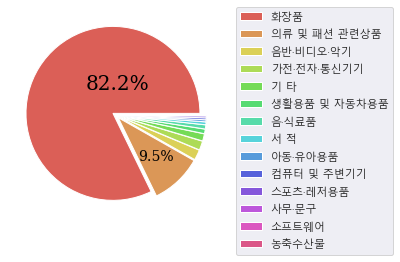

In [206]:
font1 = {'family': 'serif',
      'color':  'black',
      'weight': 'normal',
      'size': 20}
font2 = {'family': 'serif',
      'color':  'black',
      'weight': 'normal',
      'size': 14}
labels = []
ratio = []
for i in df4.values:
    labels.append(i[0])
    ratio.append(i[1])
explode = [0.04]*len(df4.values)
colors = sns.color_palette('hls',len(labels))
plt.pie(ratio,explode=explode,colors=colors)
plt.text(-0.35, 0.3, '82.2%',fontdict=font1)
plt.text(0.25, -0.52, '9.5%',fontdict=font2)
plt.legend(labels=labels,bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.show()

In [216]:
df6=df[['기간','백만원']][ (df["국가(대륙)별"]=="합계") & (df["상품군별"]=="화장품") & (df["판매유형별"]=="계") ]
df6

,기간,백만원
7227,2018 1/4,604771.0
7677,2018 2/4,658878.0
8127,2018 3/4,694831.0
8577,2018 4/4,751804.0
9027,2019 1/4,1033586.0
9477,2019 2/4,1097379.0
9927,2019 3/4,1276592.0
10377,2019 4/4,1610022.0
10827,2020 1/4,1312146.0
11277,2020 2/4,1076190.0


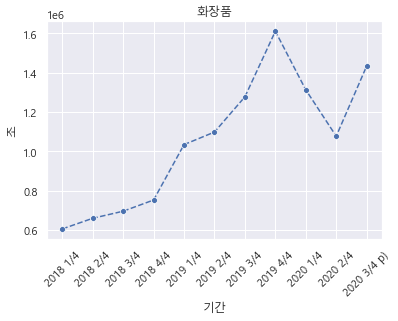

In [251]:
plt.ylabel('조')
plt.xticks(rotation=45)
sns.lineplot(data=df6,x="기간",y="백만원",marker='o',linestyle='--',ci=None).set_title("화장품")
plt.show()

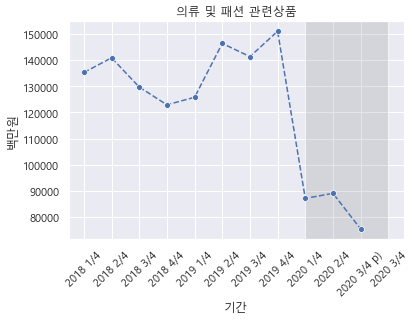

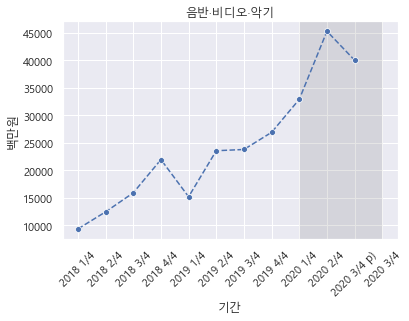

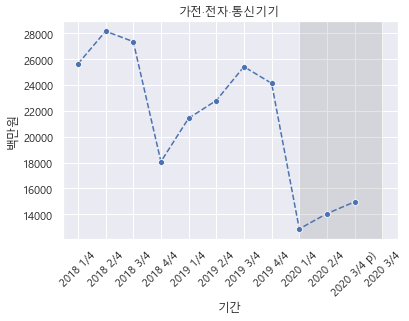

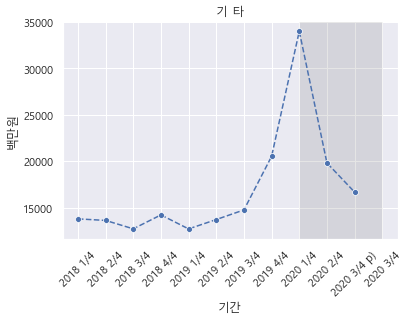

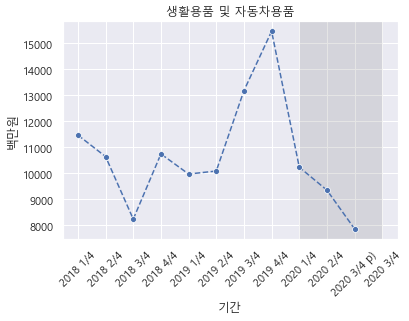

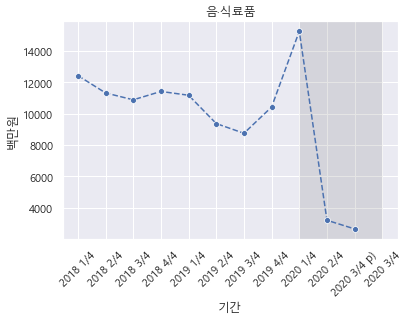

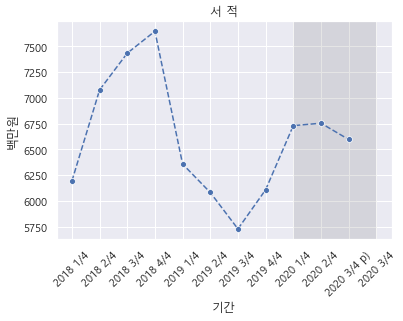

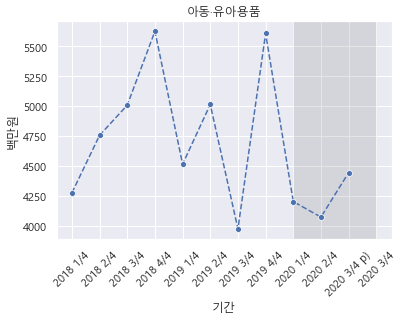

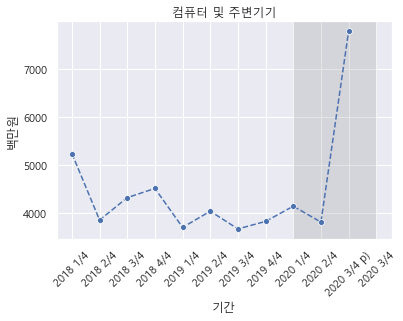

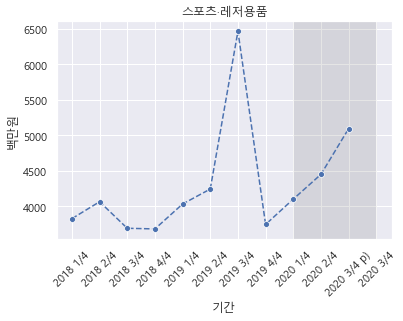

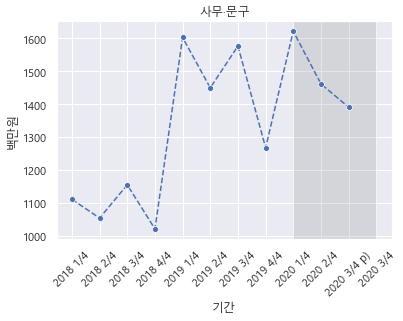

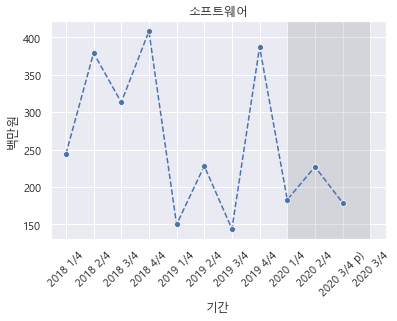

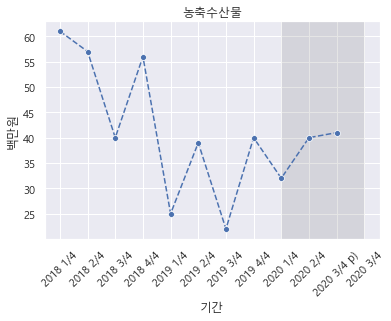

In [250]:
label_list=df5.values[1:]
for i in label_list:
    df7=df[['기간','백만원']][ (df["국가(대륙)별"]=="합계") & (df["상품군별"]==i[0]) & (df["판매유형별"]=="계") ]
    plt.ylabel('백만원')
    plt.xticks(rotation=45)
    sns.lineplot(data=df7,x="기간",y="백만원",marker='o',linestyle='--',ci=None).set_title(i[0])
    plt.axvspan('2020 1/4', '2020 3/4', facecolor='gray', alpha=0.2)
    plt.show()